#  Обратное распространение ошибки

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* http://cs231n.stanford.edu/handouts/linear-backprop.pdf
* https://www.adityaagrawal.net/blog/deep_learning/bprop_fc
* https://en.wikipedia.org/wiki/Stochastic_gradient_descent

In [3]:
!pip install torchtyping

  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.4
    Uninstalling typeguard-4.4.4:
      Successfully uninstalled typeguard-4.4.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.5.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [9]:
from torchtyping import TensorType, patch_typeguard
from typeguard import typechecked
import torch as th
from sklearn.datasets import make_regression
from torch.utils.data import DataLoader, TensorDataset



Scalar = TensorType[()]
patch_typeguard()

## Задачи для совместного разбора

1\. Реализуйте обратное распространение ошибки для модели нейрона с квадратичной функцией потерь при условии, что на вход нейрону поступает вектор `inputs`. Проверьте корректность вычисления градиентов, воспользовавшись возможностями по автоматическому дифференцированию `torch`.

2\. Настройте модель нейрона, используя метод стохастического градиентного спуска и собственную реализацию обратного распространения ошибки.

In [5]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5, random_state=42)
X = th.FloatTensor(X)
y = th.FloatTensor(y)

In [56]:
class Linear:
    def __init__(self, n_neuron, n_features):
        self.weights: TensorType["n_features_with_bias", 1] = th.randn(n_features, n_neuron)
        print(self.weights)
        self.bias = th.randn(n_features,1)
    def forward(self,imputs):
        return imputs.mm(self.weights) +self.bias

In [66]:
neuron = Linear(1,X.size()[1])

tensor([[1.5980]])


In [68]:
lr = 0.1
epoch = 1000
error = []

for i in range(epoch):
    #forward
    y_pred = neuron.forward(X)
    e = 1/X.size()[0] * ((y_pred - y.view(100,1))**2).sum()
    error.append(e)

    #backward
    dedw = 2/X.size()[0] * (y_pred - y.view(100,1)).T @ X
    dedb = 2/X.size()[0] * (y_pred - y.view(100,1)).T @ th.ones(100,1)

    neuron.weights -=lr*dedw.T
    neuron.bias -=lr*dedb

    if i % 20 == 0:
        print('epoch:' +str(i) + ' E: ' +str(e))
    
'''
    # optim
    loss_fn.backward(y_pred, y)
    neuron.backward(X, loss_fn.dinput)


    with th.no_grad():
        neuron.weights -= learning_rate * neuron.dweights
    
    '''

epoch:0 E: tensor(1.0944)
epoch:20 E: tensor(0.1506)
epoch:40 E: tensor(0.1008)
epoch:60 E: tensor(0.0978)
epoch:80 E: tensor(0.0976)
epoch:100 E: tensor(0.0976)
epoch:120 E: tensor(0.0976)
epoch:140 E: tensor(0.0976)
epoch:160 E: tensor(0.0976)
epoch:180 E: tensor(0.0976)
epoch:200 E: tensor(0.0976)
epoch:220 E: tensor(0.0976)
epoch:240 E: tensor(0.0976)
epoch:260 E: tensor(0.0976)
epoch:280 E: tensor(0.0976)
epoch:300 E: tensor(0.0976)
epoch:320 E: tensor(0.0976)
epoch:340 E: tensor(0.0976)
epoch:360 E: tensor(0.0976)
epoch:380 E: tensor(0.0976)
epoch:400 E: tensor(0.0976)
epoch:420 E: tensor(0.0976)
epoch:440 E: tensor(0.0976)
epoch:460 E: tensor(0.0976)
epoch:480 E: tensor(0.0976)
epoch:500 E: tensor(0.0976)
epoch:520 E: tensor(0.0976)
epoch:540 E: tensor(0.0976)
epoch:560 E: tensor(0.0976)
epoch:580 E: tensor(0.0976)
epoch:600 E: tensor(0.0976)
epoch:620 E: tensor(0.0976)
epoch:640 E: tensor(0.0976)
epoch:660 E: tensor(0.0976)
epoch:680 E: tensor(0.0976)
epoch:700 E: tensor(0.0976

'\n    # optim\n    loss_fn.backward(y_pred, y)\n    neuron.backward(X, loss_fn.dinput)\n\n\n    with th.no_grad():\n        neuron.weights -= learning_rate * neuron.dweights\n    \n    '

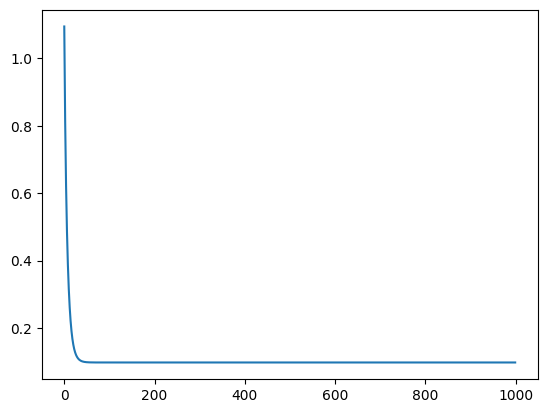

In [74]:
import matplotlib.pyplot as plt
plt.plot(error);

In [134]:
class Linear:
    def __init__(self, n_neuron, n_features,grad):
        self.weights: TensorType["n_features_with_bias", 1] = th.randn(n_features, n_neuron, requires_grad=grad)
        print(self.weights)
        self.bias = th.randn(n_features,1, requires_grad=grad)
    def forward(self,imputs):
        return imputs.mm(self.weights) +self.bias

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Реализуйте обратное распространение ошибки для модели нейрона с функцией потерь MSE при условии, что на вход нейрону поступает пакет (двумерный тензор) `inputs`. Проверьте корректность вычисления градиентов, воспользовавшись возможностями по автоматическому дифференцированию `torch`.

$$\mathbf{X} = \begin{bmatrix}
x_{10} & x_{11} & \ldots & x_{1m} \\
x_{20} & x_{21} & \ldots & x_{2m} \\
\vdots & \vdots & \ddots & \vdots \\
x_{k0} & x_{k1} & \ldots & x_{km} \\
\end{bmatrix}
\mathbf{Y} = \begin{bmatrix}
y_{1} \\
y_{2} \\
\vdots \\
y_{k} \\
\end{bmatrix}
\mathbf{W} = \begin{bmatrix}
w_{0} \\
w_{1} \\
\vdots \\
w_{m} \\
\end{bmatrix}$$

$$\hat{\mathbf{Y}} = \mathbf{X}\times \mathbf{W}$$

$$L = \frac{1}{k}\sum_{k}{(\hat{y_k}-y_k)^2}$$

$$\nabla_{\hat{\mathbf{Y}}} L=\begin{bmatrix}
\frac{\partial L}{\partial \hat{y_1}} \\
\frac{\partial L}{\partial \hat{y_2}} \\
\vdots \\
\frac{\partial L}{\partial \hat{y_k}} \\
\end{bmatrix} = \frac{2}{k}\begin{bmatrix}
\hat{y_1} - y_1 \\
\hat{y_2} - y_2 \\
\vdots \\
\hat{y_k} - y_k \\
\end{bmatrix}$$

$$\boldsymbol{\nabla_{\mathbf{W}} L = \mathbf{X}^T\nabla_{\hat{\mathbf{Y}}} L}$$

- [ ] Проверено на семинаре

In [82]:
import torch as th

class NeuronBatch:
    def __init__(self, n_features: int, seed: int | None = None, grad: bool = False):
        if seed is not None:
            th.manual_seed(seed)
        # Добавьте дополнительный вес для сдвига (bias)
        # задайте requires_grad у этого тензора, чтобы иметь возможность протестировать
        # автоматическое дифференцирование от torch
        self.weights: TensorType["n_features_with_bias", 1] = th.randn(n_features + 1, 1, requires_grad=grad)

    def add_ones_col(self, inputs: TensorType["batch", "n_features"]) -> TensorType["batch", "n_features_with_bias"]:
        """Добавляет столбец из единиц в начало матрицы inputs"""
        ones = th.ones(inputs.shape[0], 1, device=inputs.device)
        return th.cat([ones, inputs], dim=1)

    def forward(self, inputs: TensorType["batch", "n_features"]) -> TensorType["batch", 1]:
        self.inputs_with_bias = self.add_ones_col(inputs)
        return self.inputs_with_bias @ self.weights


    def backward(self, inputs: TensorType["batch", "n_features"], dnext: TensorType["batch", 1]) -> None:
        self.dweights: TensorType["n_features_with_bias", 1] = self.inputs_with_bias.t() @ dnext

In [5]:
class MSELoss:
    def forward(self, y_pred: TensorType["batch", 1], y_true: TensorType["batch", 1]) -> Scalar:
        self.y_pred = y_pred
        self.y_true = y_true
        return (y_pred - y_true).pow(2).mean()


    def backward(self, y_pred: TensorType["batch", 1], y_true: TensorType["batch", 1]) -> None:
        self.dinput: TensorType["batch", 1] = 2 * (y_pred - y_true) / y_pred.shape[0]


In [84]:

X = th.randn(5, 3)             
y = th.randn(5, 1)

model = NeuronBatch(n_features=3, seed=42, grad=True)
loss_fn = MSELoss()


y_pred = model.forward(X)
loss = loss_fn.forward(y_pred, y)


loss_fn.backward(y_pred, y)# dL/dyp
model.backward(X, loss_fn.dinput) # dL/dW

grads = model.dweights


loss.backward()
autograd_grads = model.weights.grad

print(grads)
print(autograd_grads)

tensor([[ 0.3228],
        [-0.7987],
        [-0.4844],
        [ 1.4677]], grad_fn=<MmBackward0>)
tensor([[ 0.3228],
        [-0.7987],
        [-0.4844],
        [ 1.4677]])


<p class="task" id="2"></p>

2\. Настройте модель нейрона, используя метод мини-пакетного градиентного спуска.

Используйте обратное распространение ошибки, реализованное самостоятельно. Выведите на экран полученные и правильные коэффициенты модели.

- [ ] Проверено на семинаре

In [16]:
from sklearn.datasets import make_regression
import torch as th

X, y, coef = make_regression(
    n_features=4, n_informative=4, coef=True, bias=0.5, random_state=42
)
X = th.tensor(X, dtype=th.float32)
y = th.tensor(y, dtype=th.float32).reshape(-1, 1)

neuron = NeuronBatch(n_features=4, seed=42) 
loss_fn = MSELoss()

learning_rate = 0.01
num_epochs = 200

losses = []
for epoch in range(num_epochs):
    y_pred = neuron.forward(X)
    loss = loss_fn.forward(y_pred, y)
    losses.append(loss.item())

    loss_fn.backward(y_pred, y)        # dL/dyp
    neuron.backward(X, loss_fn.dinput) # dL/dW

    with th.no_grad():
        neuron.weights -= learning_rate * neuron.dweights

    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1:3d} | Loss = {loss.item():.6f}")

print("\nИстинный bias:", 0.5)
print("Оценённый bias:", neuron.weights[0].item())

print("\nИстинные коэффициенты:", coef)
print("Оценённые коэффициенты:", neuron.weights[1:].detach().flatten())


Epoch  20 | Loss = 4542.641113
Epoch  40 | Loss = 2103.348633
Epoch  60 | Loss = 988.717346
Epoch  80 | Loss = 471.893433
Epoch 100 | Loss = 228.623169
Epoch 120 | Loss = 112.368553
Epoch 140 | Loss = 55.980858
Epoch 160 | Loss = 28.237808
Epoch 180 | Loss = 14.404174
Epoch 200 | Loss = 7.421113

Истинный bias: 0.5
Оценённый bias: 0.7746502757072449

Истинные коэффициенты: [ 5.63754967 86.47223763 27.34070719 41.48195023]
Оценённые коэффициенты: tensor([ 5.4002, 84.6057, 27.5313, 39.1809])


<p class="task" id="3"></p>

3\. Реализуйте обратное распространение ошибки для модели полносвязного слоя с функцией потерь MSE при условии, что на вход нейрону поступает пакет (двумерный тензор) `inputs`.  Проверьте корректность вычисления градиентов, воспользовавшись возможностями по автоматическому дифференцированию `torch`.

Обратите внимание, что вам потребуются оба градиента $ \boldsymbol{\nabla_{\mathbf{W}} L }$ и $\boldsymbol{\nabla_{\mathbf{X}} L}$ для распространения ошибки с несколькими слоями.

$$\mathbf{X} = \begin{bmatrix}
x_{10} & x_{11} & \ldots & x_{1m} \\
x_{20} & x_{21} & \ldots & x_{2m} \\
\vdots & \vdots & \ddots & \vdots \\
x_{k0} & x_{k1} & \ldots & x_{km} \\
\end{bmatrix}
\mathbf{Y} = \begin{bmatrix}
y_{1} \\
y_{2} \\
\vdots \\
y_{k} \\
\end{bmatrix}
\mathbf{W} = \begin{bmatrix}
w_{01} & w_{02} & \ldots & w_{0n} \\
w_{11} & w_{12} & \ldots & w_{1n} \\
\vdots & \vdots & \ddots & \vdots \\
w_{m1} & w_{m2} & \ldots & w_{mn} \\
\end{bmatrix}$$

$$\hat{\mathbf{Y}} = \mathbf{X}\times \mathbf{W}$$

$$\nabla_{\hat{\mathbf{Y}}} L = \begin{bmatrix}
\frac{\partial L}{\partial \hat{y_{11}}} & \ldots & \frac{\partial L}{\partial \hat{y_{1n}}} \\
\vdots & \vdots & \vdots \\
\frac{\partial L}{\partial \hat{y_{k1}}} & \ldots & \frac{\partial L}{\partial \hat{y_{kn}}} \\
\end{bmatrix}$$

$$\boldsymbol{\nabla_{\mathbf{W}} L = \mathbf{X}^T\times \nabla_{\hat{\mathbf{Y}}} L}$$
$$\boldsymbol{\nabla_{\mathbf{X}} L = \nabla_{\hat{\mathbf{Y}}} L\times \mathbf{W}^T}$$

- [ ] Проверено на семинаре

In [138]:
import torch as th

class Linear:
    def __init__(self, n_features: int, n_neurons: int, seed: int | None = None, grad: bool = False):
        if seed is not None:
            th.manual_seed(seed)
        # Добавьте дополнительный вес для сдвига
        # задайте requires_grad у этого тензора, чтобы иметь возможность протестировать
        # автоматическое дифференцирование от torch
        self.weights: TensorType["n_features_with_bias", "n_neurons"] = th.randn(n_features + 1, n_neurons, requires_grad=grad)
        self.dweights = None

    def add_ones_col(self, inputs: TensorType["batch", "n_features"]) -> TensorType["batch", "n_features_with_bias"]:
        """Добавляет столбец из единиц в начало матрицы inputs"""
        ones = th.ones(inputs.shape[0], 1, device=inputs.device)
        return th.cat([ones, inputs], dim=1)

    def forward(self, inputs: TensorType["batch", "n_features"]) -> TensorType["batch", "n_neurons"]:
        self.inputs_with_bias = self.add_ones_col(inputs)
        return self.inputs_with_bias @ self.weights

    def backward(self, inputs: TensorType["batch", "n_features"], dnext: TensorType["batch", "n_neurons"]):
        self.dweights: TensorType["n_features_with_bias", "n_neurons"] = self.inputs_with_bias.t() @ dnext


In [30]:
class MSELoss:
    def forward(self, y_pred: TensorType["batch", "n_neurons"], y_true: TensorType["batch", "n_neurons"]) -> Scalar:
        self.y_pred = y_pred
        self.y_true = y_true
        return (y_pred - y_true).pow(2).mean()

    def backward(self, y_pred: TensorType["batch", "n_neurons"], y_true: TensorType["batch", "n_neurons"]) -> None:
        self.dinput: TensorType["batch", "n_neurons"] = 2 * (y_pred - y_true) / y_pred.shape[0]

In [44]:
X = th.randn(5, 4, dtype=th.float32)  
y = th.randn(5, 2, dtype=th.float32)  

linear = Linear(n_features=4, n_neurons=2, seed=42, grad=False)
loss_fn = MSELoss()

linear_torch = th.nn.Linear(4, 2, bias=True)
with th.no_grad():
    linear_torch.weight[:] = linear.weights[1:].T
    linear_torch.bias[:]   = linear.weights[0]

y_pred = linear.forward(X)
loss = loss_fn.forward(y_pred, y)

y_pred_torch = linear_torch(X)
loss_torch = th.nn.MSELoss()(y_pred_torch, y)

loss_fn.backward(y_pred, y)        # dL/dY
linear.backward(X, loss_fn.dinput) # dL/dW


loss_torch.backward()


print("Наши градиенты:")
print(linear.dweights)

print("\ntorch градиенты:")
print("bias.grad:\n", linear_torch.bias.grad)
print("weights.grad:\n", linear_torch.weight.grad)


Наши градиенты:
tensor([[-2.5724,  0.1681],
        [ 5.4816,  0.9904],
        [-0.8554,  0.1936],
        [ 4.2509,  0.2258],
        [ 2.5971,  0.7655]])

torch градиенты:
bias.grad:
 tensor([-1.2862,  0.0840])
weights.grad:
 tensor([[ 2.7408, -0.4277,  2.1255,  1.2985],
        [ 0.4952,  0.0968,  0.1129,  0.3828]])


<p class="task" id="4"></p>

4\. Настройте полносвязный слой, используя метод пакетного градиентного спуска. Используйте обратное распространение ошибки, реализованное самостоятельно. Выведите на экран полученные и правильные коэффициенты модели.

- [ ] Проверено на семинаре

In [128]:
X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5, random_state=42)
X = th.tensor(X,dtype=th.float32)
y = th.tensor(y,dtype=th.float32).reshape(-1, 1)

num_epochs = 5000

linear = Linear(n_features=4, n_neurons=1, seed=42)
loss_fn = MSELoss()


linear_torch = th.nn.Linear(4, 1, bias=True)
with th.no_grad():
    linear_torch.weight[:] = linear.weights[1:].T
    linear_torch.bias[:]   = linear.weights[0]
optimizer = th.optim.SGD(linear_torch.parameters(), lr=learning_rate)

y_pred_torch = linear_torch(X)
loss_torch = th.nn.MSELoss()(y_pred_torch, y)
loss_torch.backward()



for epoch in range(num_epochs):

    y_pred = linear.forward(X)
    loss = loss_fn.forward(y_pred, y)


    loss_fn.backward(y_pred, y)
    linear.backward(X, loss_fn.dinput)


    with th.no_grad():
        linear.weights -= learning_rate * linear.dweights



    y_pred_torch = linear_torch(X)
    loss_torch = th.nn.MSELoss()(y_pred_torch, y)
    optimizer.zero_grad()
    loss_torch.backward()
    optimizer.step()

    
    if (epoch + 1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


print(coef)
print(linear.weights[1:].flatten())

Epoch [50/5000], Loss: 1439.3452
Epoch [100/5000], Loss: 228.6232
Epoch [150/5000], Loss: 39.7002
Epoch [200/5000], Loss: 7.4211
Epoch [250/5000], Loss: 1.4651
Epoch [300/5000], Loss: 0.3003
Epoch [350/5000], Loss: 0.0631
Epoch [400/5000], Loss: 0.0135
Epoch [450/5000], Loss: 0.0029
Epoch [500/5000], Loss: 0.0006
Epoch [550/5000], Loss: 0.0001
Epoch [600/5000], Loss: 0.0000
Epoch [650/5000], Loss: 0.0000
Epoch [700/5000], Loss: 0.0000
Epoch [750/5000], Loss: 0.0000
Epoch [800/5000], Loss: 0.0000
Epoch [850/5000], Loss: 0.0000
Epoch [900/5000], Loss: 0.0000
Epoch [950/5000], Loss: 0.0000
Epoch [1000/5000], Loss: 0.0000
Epoch [1050/5000], Loss: 0.0000
Epoch [1100/5000], Loss: 0.0000
Epoch [1150/5000], Loss: 0.0000
Epoch [1200/5000], Loss: 0.0000
Epoch [1250/5000], Loss: 0.0000
Epoch [1300/5000], Loss: 0.0000
Epoch [1350/5000], Loss: 0.0000
Epoch [1400/5000], Loss: 0.0000
Epoch [1450/5000], Loss: 0.0000
Epoch [1500/5000], Loss: 0.0000
Epoch [1550/5000], Loss: 0.0000
Epoch [1600/5000], Los

<p class="task" id="5"></p>

5\. Используя решения предыдущих задач, создайте нейросеть и решите задачу регрессии. При наличии корректно реализованных методов `backward` у `Linear` и `MSE` вы можете обобщить процедуру распространения ошибки на любое количество слоев. Реализуйте и обучите модель, состояющую из двух полносвязных слоев:

1. Полносвязный слой с 10 нейронами;
2. Полносвязный слой с 1 нейроном;

Схематично процедура обратного распространения ошибки представлена на рис. ниже.

В процессе обучения сохраняйте промежуточные прогнозы моделей. Визуализируйте облако точек и прогнозы модели в начале, середине и после окончания процесса обучения (не обязательно три, можно взять больше промежуточных вариантов).


- [ ] Проверено на семинаре

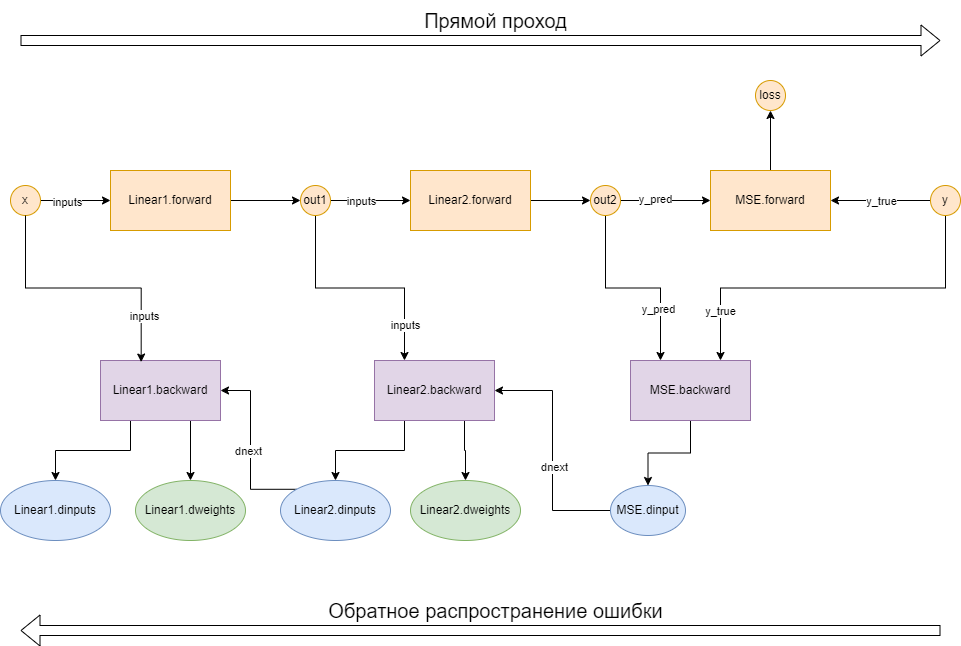

Epoch [50/5000], Loss = 1.0390
Epoch [100/5000], Loss = 0.4694
Epoch [150/5000], Loss = 0.3126
Epoch [200/5000], Loss = 0.2226
Epoch [250/5000], Loss = 0.1693
Epoch [300/5000], Loss = 0.1376
Epoch [350/5000], Loss = 0.1187
Epoch [400/5000], Loss = 0.1074
Epoch [450/5000], Loss = 0.1006
Epoch [500/5000], Loss = 0.0966
Epoch [550/5000], Loss = 0.0941
Epoch [600/5000], Loss = 0.0927
Epoch [650/5000], Loss = 0.0918
Epoch [700/5000], Loss = 0.0912
Epoch [750/5000], Loss = 0.0909
Epoch [800/5000], Loss = 0.0907
Epoch [850/5000], Loss = 0.0906
Epoch [900/5000], Loss = 0.0906
Epoch [950/5000], Loss = 0.0905
Epoch [1000/5000], Loss = 0.0905
Epoch [1050/5000], Loss = 0.0905
Epoch [1100/5000], Loss = 0.0905
Epoch [1150/5000], Loss = 0.0905
Epoch [1200/5000], Loss = 0.0905
Epoch [1250/5000], Loss = 0.0905
Epoch [1300/5000], Loss = 0.0905
Epoch [1350/5000], Loss = 0.0905
Epoch [1400/5000], Loss = 0.0905
Epoch [1450/5000], Loss = 0.0905
Epoch [1500/5000], Loss = 0.0905
Epoch [1550/5000], Loss = 0.09

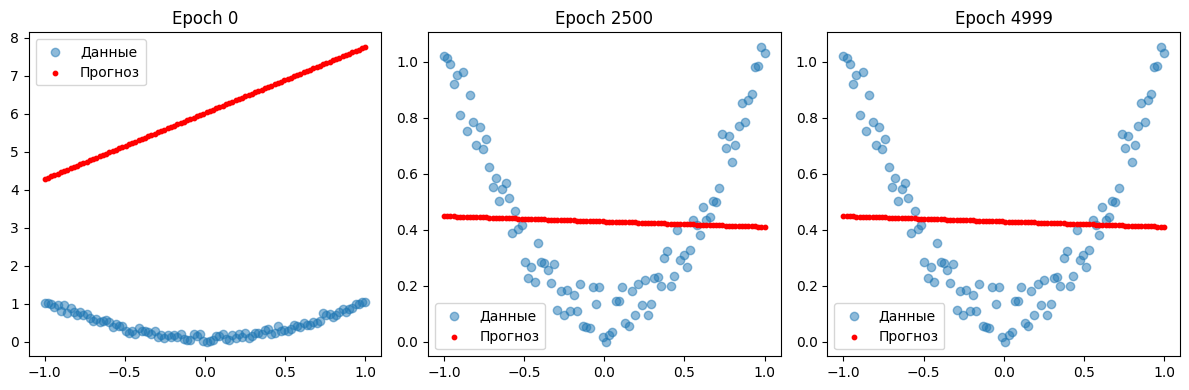

In [142]:
X = th.linspace(-1, 1, 100).view(-1, 1)
y = X.pow(2) + 0.2 * th.rand(X.size())


linear1 = Linear(n_features=1, n_neurons=10, seed=42)
linear2 = Linear(n_features=10, n_neurons=1, seed=42)
loss_fn = MSELoss()

learning_rate = 0.001
num_epochs = 5000

hist = {}  


for epoch in range(num_epochs):
    h = linear1.forward(X)
    y_pred = linear2.forward(h)
    loss = loss_fn.forward(y_pred, y)

    loss_fn.backward(y_pred, y)   # dL/dyp
    linear2.backward(h, loss_fn.dinput)
    linear1.backward(X, loss_fn.dinput @ linear2.weights[1:].T)  # исключаем bias

    with th.no_grad():
        linear2.weights -= learning_rate * linear2.dweights
        linear1.weights -= learning_rate * linear1.dweights

    if epoch in [0, num_epochs // 2, num_epochs - 1]:
        hist[epoch] = y_pred.detach()

    if (epoch + 1) % 50 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss = {loss.item():.4f}")

plt.figure(figsize=(12, 4))

for i, (ep, y_hat) in enumerate(hist.items()):
    plt.subplot(1, len(hist), i+1)
    plt.scatter(X, y, label="Данные", alpha=0.5)
    plt.scatter(X, y_hat, color="red", label="Прогноз", s=10)
    plt.title(f"Epoch {ep}")
    plt.legend()

plt.tight_layout()
plt.show()


<p class="task" id="6"></p>

6\. Модель из предыдущей задачи является линейной и не способна качественно предсказать искомую зависимость. Для того, чтобы сделать модель нелинейной, в нейронных сетях используются функции активации. Для того, чтобы встроить такую функцию в процесс обратного распространения ошибки, необходимо реализовать соответствующий слой с методами `forward` и `backward`.

$$
f(x) = \max(0, x)
$$

$$
\frac{\partial L}{\partial x} = \frac{\partial L}{\partial f}\frac{\partial f}{\partial x} = \frac{\partial L}{\partial f}
\begin{cases}
1 & \text{если } x \ge 0 \\
0 & \text{если } x <  0
\end{cases}
$$

Здесь $L$ - это функция (слой), следующая за ReLU в потоке вычислений.

Реализуйте и обучите модель, состояющую из двух полносвязных слоев, разделенных функцией активации ReLU:
1. Полносвязный слой с 10 нейронами
2. Активация ReLU
3. Полносвязный слой с 1 нейроном

В процессе обучения сохраняйте промежуточные прогнозы моделей. Визуализируйте облако точек и прогнозы модели в начале, середине и после окончания процесса обучения (не обязательно три, можно взять больше промежуточных вариантов).




- [ ] Проверено на семинаре

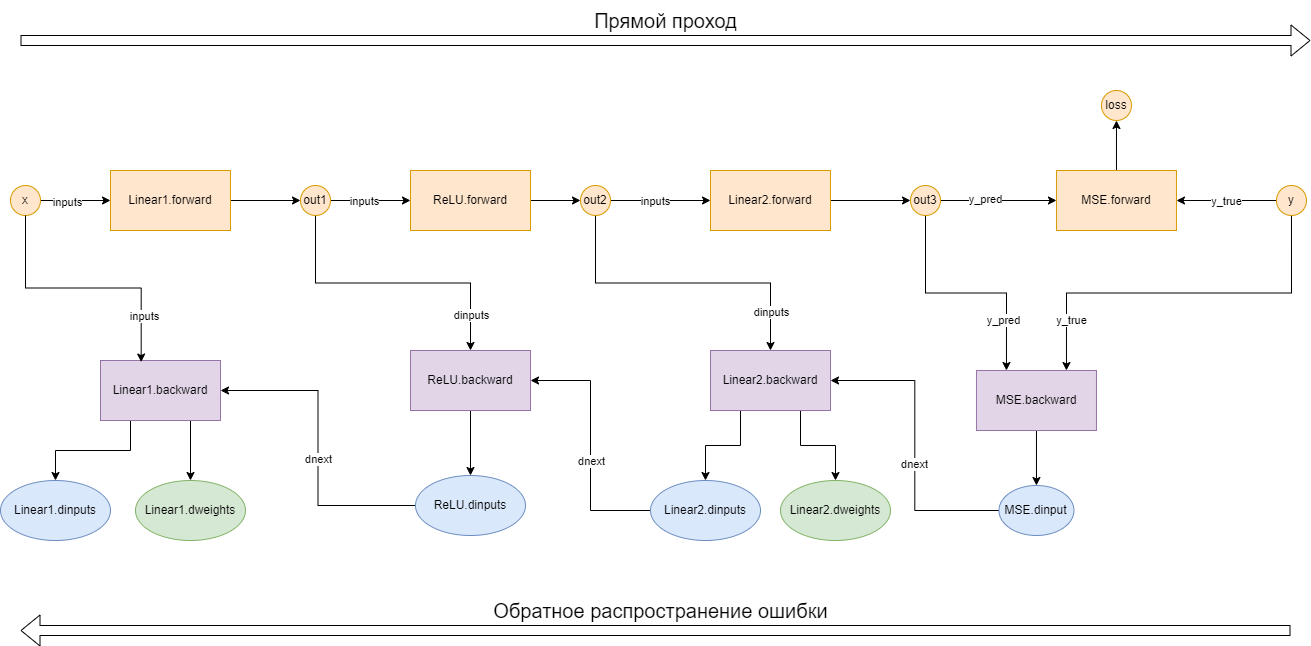

In [69]:
class ReLU:
    def forward(self, inputs: TensorType["batch", "n_features"]) -> TensorType["batch", "n_features"]:
        self.inputs = inputs
        return th.clamp(inputs, min=0)


    def backward(
        self,
        inputs: TensorType["batch", "n_features"],
        dvalues: TensorType["batch", "n_features"]
    ) -> TensorType["batch", "n_features"]:
        self.dinputs = dvalues * (self.inputs >= 0).float()
        return self.dinputs



Epoch 50/5000 | Loss = 0.4885
Epoch 100/5000 | Loss = 0.2992
Epoch 150/5000 | Loss = 0.2049
Epoch 200/5000 | Loss = 0.1495
Epoch 250/5000 | Loss = 0.1164
Epoch 300/5000 | Loss = 0.0966
Epoch 350/5000 | Loss = 0.0846
Epoch 400/5000 | Loss = 0.0772
Epoch 450/5000 | Loss = 0.0727
Epoch 500/5000 | Loss = 0.0698
Epoch 550/5000 | Loss = 0.0679
Epoch 600/5000 | Loss = 0.0667
Epoch 650/5000 | Loss = 0.0657
Epoch 700/5000 | Loss = 0.0650
Epoch 750/5000 | Loss = 0.0644
Epoch 800/5000 | Loss = 0.0639
Epoch 850/5000 | Loss = 0.0634
Epoch 900/5000 | Loss = 0.0630
Epoch 950/5000 | Loss = 0.0626
Epoch 1000/5000 | Loss = 0.0622
Epoch 1050/5000 | Loss = 0.0618
Epoch 1100/5000 | Loss = 0.0614
Epoch 1150/5000 | Loss = 0.0610
Epoch 1200/5000 | Loss = 0.0607
Epoch 1250/5000 | Loss = 0.0603
Epoch 1300/5000 | Loss = 0.0600
Epoch 1350/5000 | Loss = 0.0596
Epoch 1400/5000 | Loss = 0.0592
Epoch 1450/5000 | Loss = 0.0589
Epoch 1500/5000 | Loss = 0.0586
Epoch 1550/5000 | Loss = 0.0582
Epoch 1600/5000 | Loss = 0.0

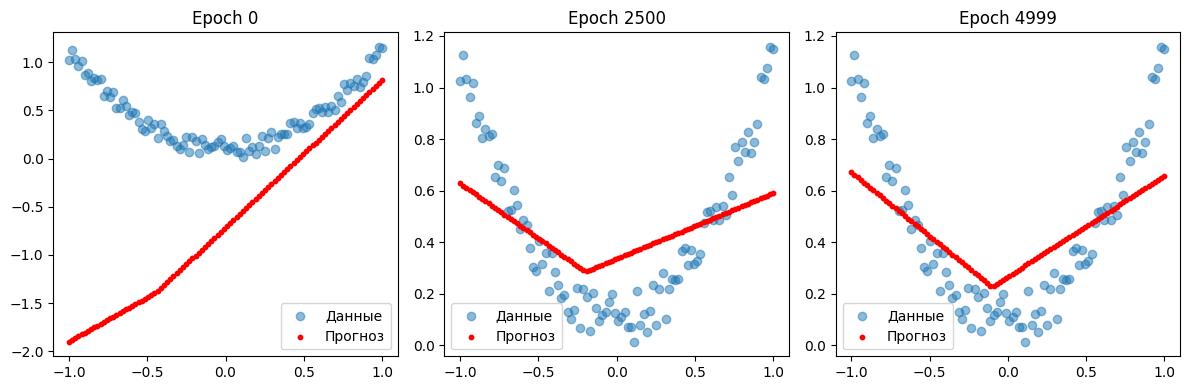

In [146]:
X = th.linspace(-1, 1, 100).view(-1, 1)
y = X.pow(2) + 0.2 * th.rand(X.size())


linear1 = Linear(n_features=1, n_neurons=10, seed=42)
relu = ReLU()
linear2 = Linear(n_features=10, n_neurons=1, seed=43)
loss_fn = MSELoss()

learning_rate = 0.001
num_epochs = 5000
hist = {}


for epoch in range(num_epochs):
    h = linear1.forward(X)
    h_relu = relu.forward(h)
    y_pred = linear2.forward(h_relu)
    loss = loss_fn.forward(y_pred, y)

    loss_fn.backward(y_pred, y)                # dL/dyp
    linear2.backward(h_relu, loss_fn.dinput)   # dL/dW2
    dh = relu.backward(h, loss_fn.dinput @ linear2.weights[1:].T)  # dL/dh после ReLU
    linear1.backward(X, dh)                    # dL/dW1

    with th.no_grad():
        linear2.weights -= learning_rate * linear2.dweights
        linear1.weights -= learning_rate * linear1.dweights

    if epoch in [0, num_epochs // 2, num_epochs - 1]:
        hist[epoch] = y_pred.detach().numpy()

    if (epoch + 1) % 50 == 0:
        print(f"Epoch {epoch+1}/{num_epochs} | Loss = {loss.item():.4f}")


plt.figure(figsize=(12, 4))

for i, (ep, y_hat) in enumerate(hist.items()):
    plt.subplot(1, len(snapshots), i+1)
    plt.scatter(X, y, label="Данные", alpha=0.5)
    plt.scatter(X, y_hat, color="red", label="Прогноз", s=10)
    plt.title(f"Epoch {ep}")
    plt.legend()

plt.tight_layout()
plt.show()
